In [ ]:
# 1. SIMPLE LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
df=fetch_california_housing()
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
dataset=pd.DataFrame(df.data)
dataset.columns=df.feature_names
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
from sklearn.model_selection import train_test_split
x=dataset
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [15]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [33]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(regression,x_train,y_train,scoring="neg_mean_squared_error",cv=10)
print(abs(np.mean(mse)))

0.5196355647645039


In [35]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
dummy = DummyRegressor(strategy="mean")

# Compute baseline MSE
mse_baseline = cross_val_score(dummy, x, y, scoring="neg_mean_squared_error", cv=10)

print("Baseline MSE:", abs(mse_baseline.mean()))

Baseline MSE: 1.3804996309536803


In [37]:
r_pred=regression.predict(x_test)
r_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

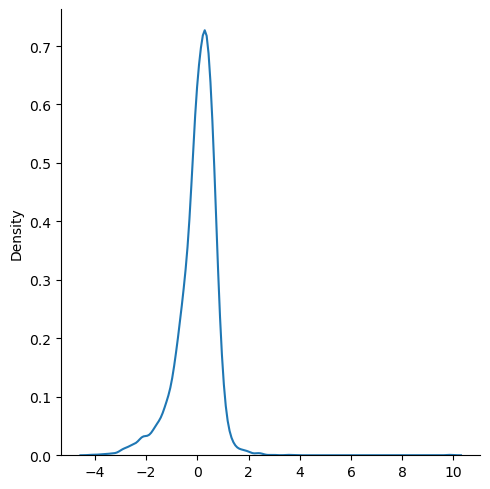

In [41]:
import seaborn as sns
sns.displot(r_pred-y_test,kind='kde')


In [43]:
from sklearn.metrics import r2_score
score=r2_score(r_pred,y_test)
score

0.33767016589309873

In [ ]:
# 2. RIDGE METHOD (PREVENTS OVERFITTING)

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge_regression=Ridge()
parameters={"alpha":[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regression,parameters,scoring="neg_mean_squared_error",cv=10)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40,
                                   50, 60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [49]:
print(ridgecv.best_params_)

{'alpha': 2}


In [54]:
print(abs(ridgecv.best_score_))

0.5196349913487913


In [60]:
rid_pred=ridgecv.predict(x_test)

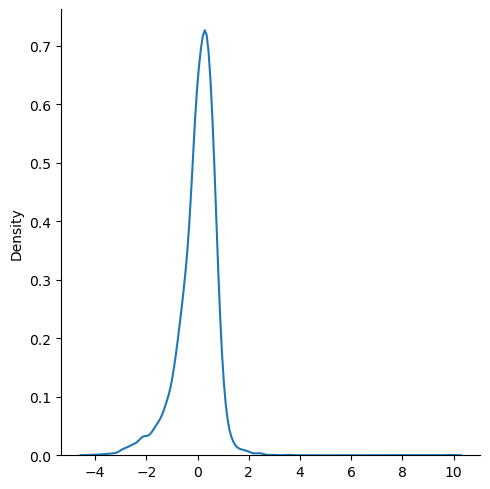

In [62]:
sns.displot(rid_pred-y_test,kind="kde")

In [64]:
score_2=r2_score(rid_pred,y_test)
score

0.33767016589309873

In [ ]:
# 3. LASSO METHOD (OVERFITTING AND BEST FEATURE FINDING)

In [68]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso_regression=Lasso()
parameters_2={"alpha":[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90]}
lasso_cv=GridSearchCV(lasso_regression,parameters_2,scoring="neg_mean_squared_error",cv=10)
lasso_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40,
                                   50, 60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [72]:
print(lasso_cv.best_params_)

{'alpha': 1}


In [76]:
print(abs(lasso_cv.best_score_))

1.3369033214482022


In [78]:
las_pred=lasso_cv.predict(x_test)

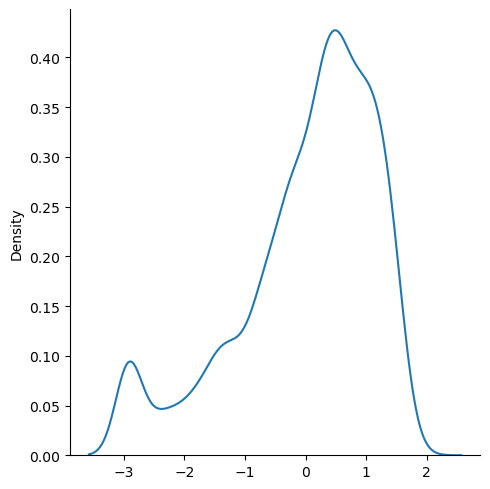

In [80]:
sns.displot(las_pred-y_test,kind="kde") 
# DISTORTION OCCURED DUE TO LASSO REMOVING SOME FEATURES WITH VERY SMALL COEFFICIENTS(SLOPE) AND SINCE DATA IS SMALL THIS IS HAPPENING. 
# THUS RIDGE IS A BETTER MODEL HERE

In [82]:
score_3=r2_score(las_pred,y_test)
score

0.33767016589309873

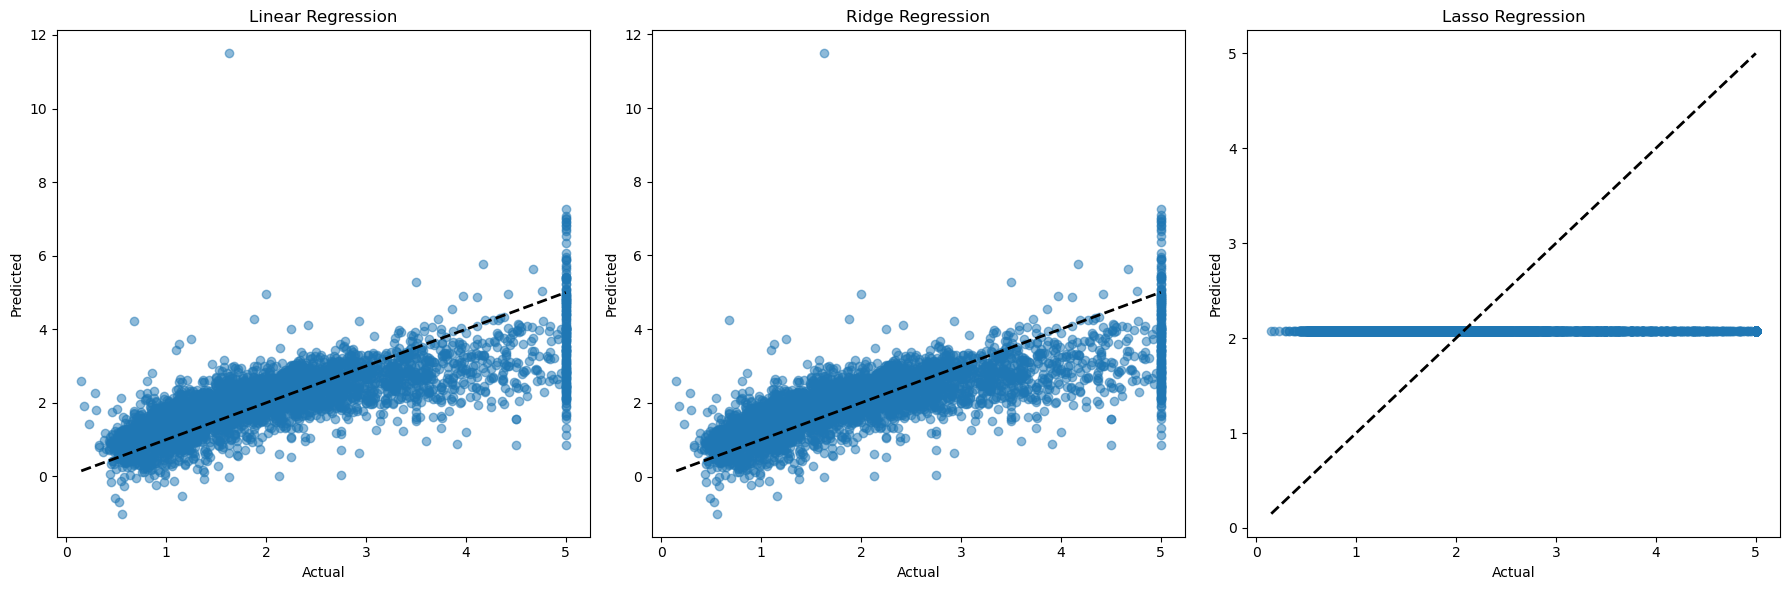

In [90]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
x=dataset
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Linear Regression plot
ax1.scatter(y_test, r_pred, alpha=0.5)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_title('Linear Regression')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')

# Ridge Regression plot
ax2.scatter(y_test, rid_pred, alpha=0.5)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_title('Ridge Regression')
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')

# Lasso Regression plot
ax3.scatter(y_test, las_pred, alpha=0.5)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_title('Lasso Regression')
ax3.set_xlabel('Actual')
ax3.set_ylabel('Predicted')

plt.tight_layout()
plt.show()